# Portfolio 4

### Name -: Priyam Sinha
### Student ID -: 47750731

### What is COVID-19?

COVID-19 is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. The virus can spread from person to person, but good hygiene can prevent infection.

COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.



In this portfolio, we will be working on a Covid 19 dataset obtained from Kaggle Data file uploaded on github as covid19_data.csv .

### Objective of the Notebook

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. 

Visualisation of datewise active, confirmed and recovered cases. 

Clustering the countries in order of mortality rate and recovery rate for comparisions. 

Perform predictions using regression in order to study the impact and spread of the COVID-19 in comming days. 

The goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month. 


## Let's get Started

In [97]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading dataset
Loading dataset using read csv function

In [98]:
#Uploading the covid dataset
covid=pd.read_csv("/Users/priyamsinha/Downloads/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Data Pre Processing

In [99]:
#basic 
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (98252, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     31156
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


### Data Cleaning

In [100]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["SNo", "Province/State"],axis = 1,inplace=True)
print("Checking for null values:\n",covid.isnull().sum())


Checking for null values:
 ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [101]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])
covid["Last Update"]=pd.to_datetime(covid["Last Update"], format= 'mixed' )
print("Checking Data-type of each column:\n",covid.dtypes)



Checking Data-type of each column:
 ObservationDate    datetime64[ns]
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


### Checking the correlation and the outliers with pair plot

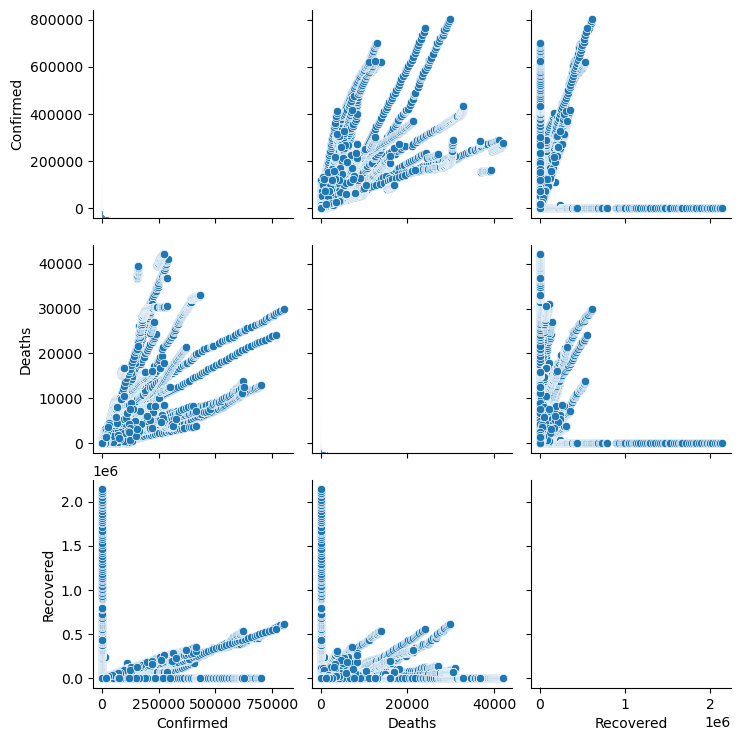

In [102]:
sns.pairplot(covid)

### Applying Extrapolatory Data Analysis creating new features.

In [103]:
#grouping the covid cases by Country and then by date
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [104]:
#Creating the new Variable with group by more log variables
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])
print(grouped_country.head())

                                 Confirmed  Recovered  Deaths  Active Cases  \
Country/Region  ObservationDate                                               
 Azerbaijan     2020-02-28             1.0        0.0     0.0           1.0   
('St. Martin',) 2020-03-10             2.0        0.0     0.0           2.0   
Afghanistan     2020-02-24             1.0        0.0     0.0           1.0   
                2020-02-25             1.0        0.0     0.0           1.0   
                2020-02-26             1.0        0.0     0.0           1.0   

                                 log_confirmed  log_active  
Country/Region  ObservationDate                             
 Azerbaijan     2020-02-28            0.000000    0.000000  
('St. Martin',) 2020-03-10            0.693147    0.693147  
Afghanistan     2020-02-24            0.000000    0.000000  
                2020-02-25            0.000000    0.000000  
                2020-02-26            0.000000    0.000000  


## Datewise analysis 

In [105]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()
datewise.head()

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,0 days
2020-01-23,653.0,30.0,18.0,1 days
2020-01-24,941.0,36.0,26.0,2 days
2020-01-25,1438.0,39.0,42.0,3 days
2020-01-26,2118.0,52.0,56.0,4 days


In [106]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  223
Total number of Confirmed Cases around the World:  24996456.0
Total number of Recovered Cases around the World:  16409757.0
Total number of Deaths Cases around the World:  842499.0
Total number of Active Cases around the World:  7744200.0
Total number of Closed Cases around the World:  17252256.0
Approximate number of Confirmed Cases per Day around the World:  113106.0
Approximate number of Recovered Cases per Day around the World:  74252.0
Approximate number of Death Cases per Day around the World:  3812.0
Approximate number of Confirmed Cases per hour around the World:  4713.0
Approximate number of Recovered Cases per hour around the World:  3094.0
Approximate number of Death Cases per hour around the World:  159.0
Number of Confirmed Cases in last 24 hours:  262008.0
Number of Recovered Cases in last 24 hours:  211592.0
Number of Death Cases in last 24 hours:  5375.0


In [107]:
#visualisation
import plotly.express as px
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

#### Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#### Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead.

In [108]:
#Visualisation
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

#### Closed Cases = Number of Recovered Cases + Number of Death Cases 
#### Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

#### Growth rate of Confirmed, Recovered and Death Cases 

In [109]:
#Visualisation
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [110]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [111]:
#Viewing the head
countrywise.head()

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,5961094.0,2140614.0,182761.0,3.065897,35.909751
Brazil,3846153.0,3202185.0,120262.0,3.126813,83.256828
India,3542733.0,2713933.0,63498.0,1.792345,76.605632
Russia,982573.0,802365.0,16977.0,1.727811,81.659582
Peru,629961.0,438017.0,28471.0,4.519486,69.530812


## Clustering of Countries

The clustering of countries can be done considering different features. Here I'm trying to cluster different countries based on the Mortality and Recovery rate of indivisual country.

As we all are well aware that COVID-19 has different Mortality Rate among different countries based on different factors and so is the Recovery Rate because of pandemic controlling practices followed by the individual country. Also Mortality Rate and Recovery Rate both togther takes into account all types of cases Confirmed, Recoverd and Deaths.

Let's checkout how these clusters look like!

In [112]:
#Importing the neccesary library
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

std=StandardScaler()
X=countrywise[["Mortality","Recovery"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [113]:
#Cross Validating the Proper Number of cluster
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

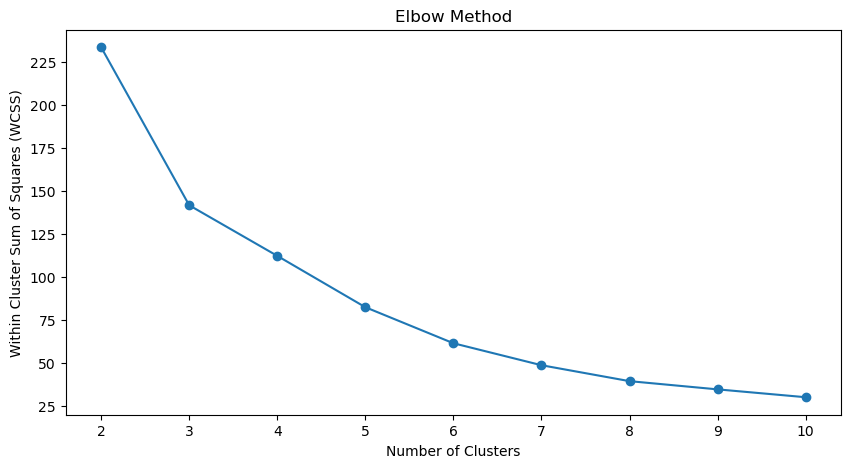

In [114]:
#Visulalisation Of Elbow method

x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

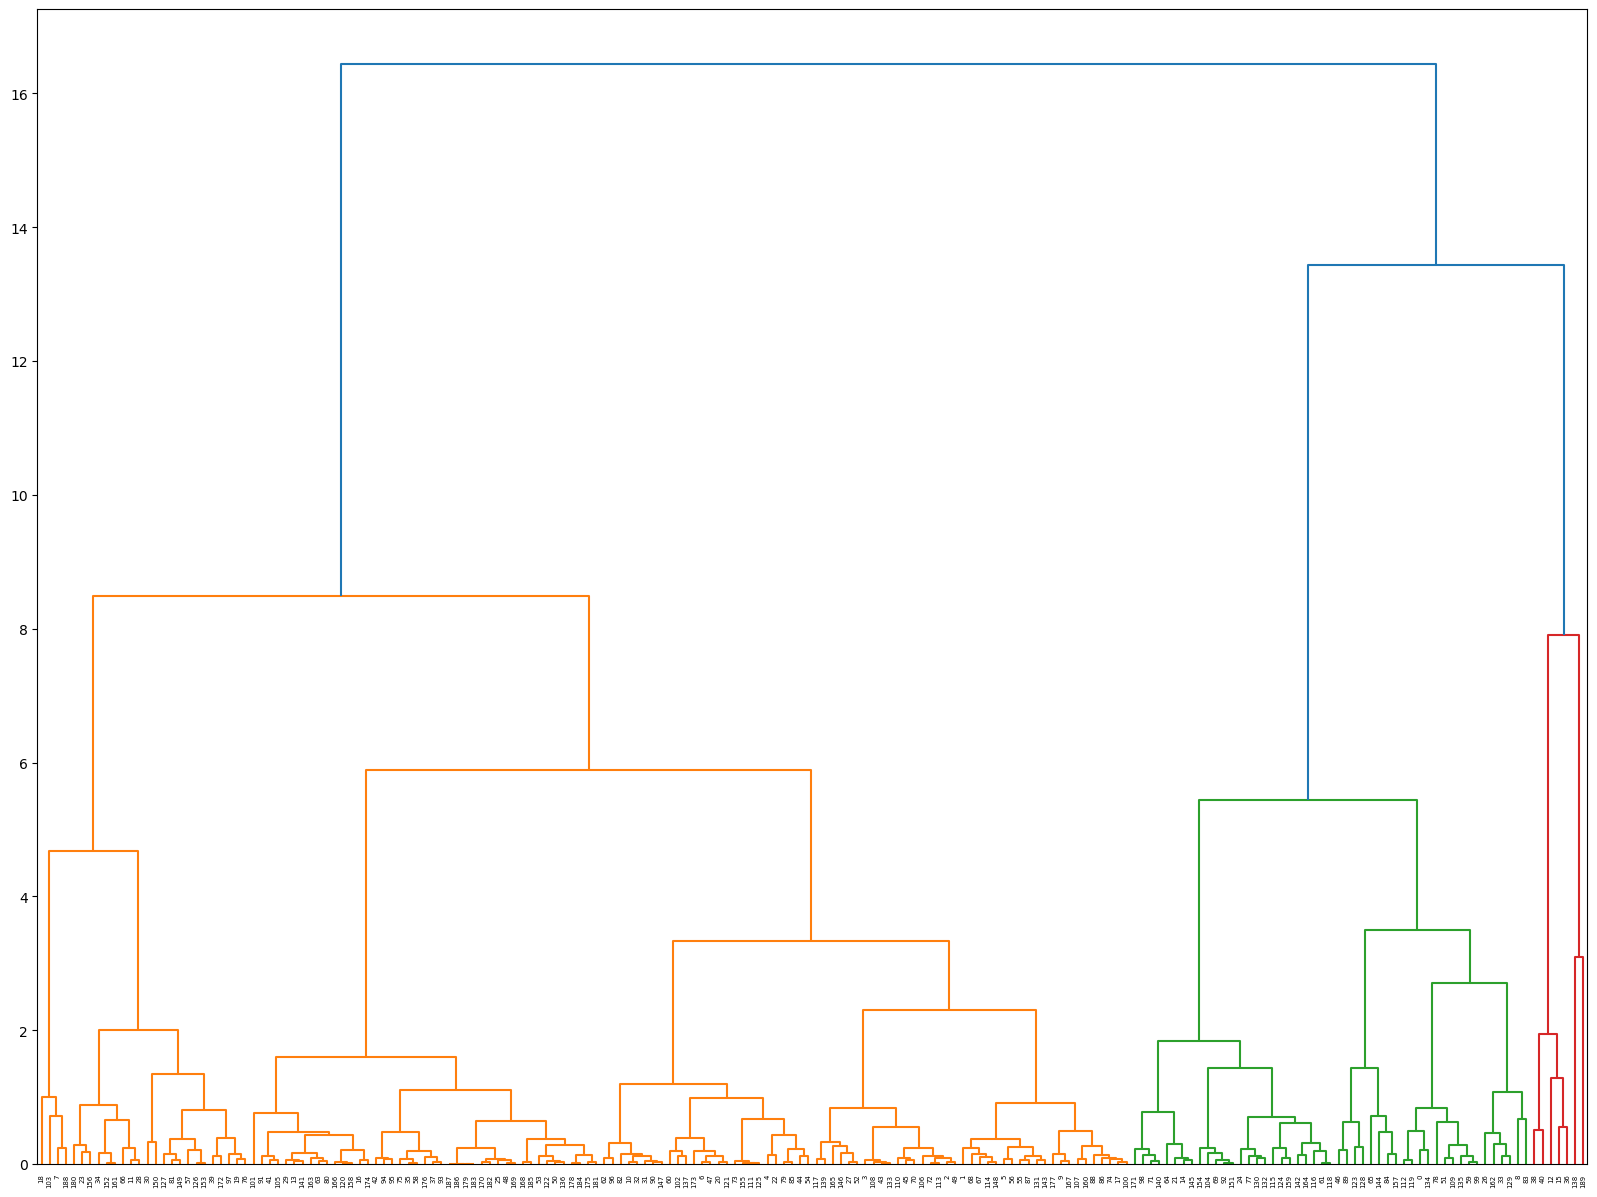

In [115]:
#Dendodiagram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

All methods namely Elbow Method and Hierarchical Clustering shows **K=3** will correct number of clusters.

In [116]:
#Finalising the k means
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)


In [117]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [118]:
countrywise["Clusters"]=clf_final.predict(X)

### Summary of Clusters

In [119]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Clusters
Country/Region,,,,,,
US,5961094.00,2140614.00,182761.00,3.07,35.91,1.00
Spain,439286.00,150376.00,29011.00,6.60,34.23,1.00
Ukraine,119751.00,58156.00,2540.00,2.12,48.56,1.00
Bolivia,115354.00,56749.00,4938.00,4.28,49.20,1.00
Romania,85833.00,37388.00,3539.00,4.12,43.56,1.00
Sweden,83958.00,0.00,5821.00,6.93,0.00,1.00
Honduras,59645.00,10156.00,1842.00,3.09,17.03,1.00
Ethiopia,49654.00,18116.00,770.00,1.55,36.48,1.00
Costa Rica,39699.00,15737.00,418.00,1.05,39.64,1.00


In [120]:
#Calculating extra variables
print("Avergae Mortality Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())

Avergae Mortality Rate of Cluster 0:  2.2463194361559777
Avergae Recovery Rate of Cluster 0:  83.75183966895968
Avergae Mortality Rate of Cluster 1:  2.3649469755029395
Avergae Recovery Rate of Cluster 1:  39.4954479457303
Avergae Mortality Rate of Cluster 2:  13.887372332715879
Avergae Recovery Rate of Cluster 2:  41.534456148992625


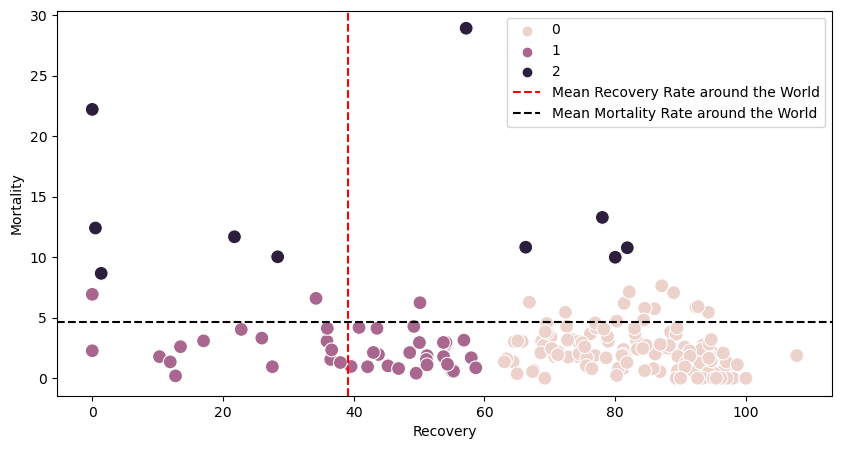

In [121]:
#visualisation with clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Recovery"],y=countrywise["Mortality"],hue=countrywise["Clusters"],s=100)
plt.axvline(((datewise["Recovered"]/datewise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((datewise["Deaths"]/datewise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend()

### Cluster of Countries Conclusion

In [122]:
print("Few Countries belonging to Cluster 0: ",list(countrywise[countrywise["Clusters"]==0].head(10).index))
print("Few Countries belonging to Cluster 1: ",list(countrywise[countrywise["Clusters"]==1].head(10).index))
print("Few Countries belonging to Cluster 2: ",list(countrywise[countrywise["Clusters"]==2].head(10).index))

Few Countries belonging to Cluster 0:  ['Brazil', 'India', 'Russia', 'Peru', 'South Africa', 'Colombia', 'Chile', 'Argentina', 'Iran', 'Saudi Arabia']
Few Countries belonging to Cluster 1:  ['US', 'Spain', 'Ukraine', 'Bolivia', 'Romania', 'Sweden', 'Honduras', 'Ethiopia', 'Costa Rica', 'Nepal']
Few Countries belonging to Cluster 2:  ['Mexico', 'UK', 'France', 'Italy', 'Belgium', 'Netherlands', 'Hungary', 'Yemen', 'Western Sahara', 'MS Zaandam']


### Applying Linear Regression

In [123]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [124]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [125]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

#Creating an Instance of Linear Regression
lin_reg=LinearRegression()

In [126]:
#Fitting the regressor 
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression()

In [127]:
#predicting the regressor
prediction_valid_linreg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [128]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))


In [129]:
#Visualisation
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

#### The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear.

#### Polynomial Regression for Prediction of Confirmed Cases

In [130]:
#Splitting the dataset
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [131]:
## Creating an instance of POlynominal Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 8)

In [132]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [133]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [134]:
#Instance of Linear regression with polynomial regression
linreg=LinearRegression()
linreg.fit(train_poly,y)
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  131411.73150055087


In [135]:
#Visualisation
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>